<a href="https://colab.research.google.com/github/tomoi17/q-macro/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   year countrycode       rgdpna       rkna        pop        emp  \
0  1990         GBR  1454250.625  6776785.5  57.110117  26.702387   
1  1991         GBR  1435970.125  6870654.5  57.264600  25.926447   
2  1992         GBR  1442380.375  6966937.5  57.419469  25.345592   

           avh     labsh    rtfpna     alpha           y_n         hours  \
0  1757.427623  0.630598  0.845003  0.369402  54461.445312  46927.512249   
1  1741.230467  0.637392  0.845823  0.362608  55386.304688  45143.919269   
2  1710.729746  0.634956  0.862149  0.365044  56908.527344  43359.459011   

   tfp_term  cap_term    lab_term  y_n_shifted  tfp_term_shifted  \
0  0.765618  2.463408  821.702261   100.000000        100.000000   
1  0.768970  2.436488  788.339031   101.698189        100.437813   
2  0.791676  2.472965  755.135144   104.493233        103.403496   

   cap_term_shifted  lab_term_shifted  
0        100.000000        100.000000  
1         98.907196         95.939742  
2        100.387947      

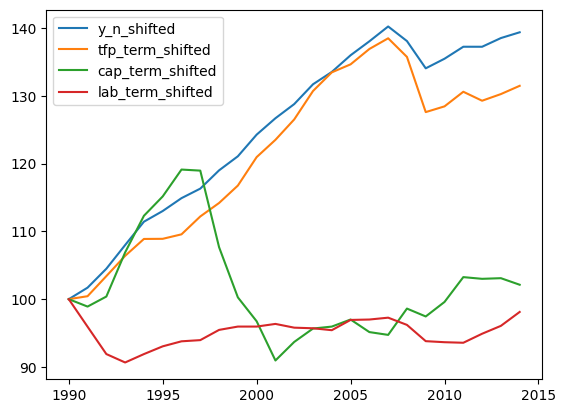

Index(['year', 'countrycode', 'country', 'rgdpna', 'rnna', 'emp', 'avh',
       'labsh', 'hc', 'rtfpna', 'alpha', 'gdp_per_worker',
       'capital_per_worker', 'human_capital_per_worker', 'hours_per_worker'],
      dtype='object')
       Country  Growth Rate  TFP Growth  Capital Deepening  Labor Growth  TFP Share  Capital Share  Labor Share
     Australia        1.28%       0.97%              0.39%        -0.08%     75.86%         30.22%       -6.08%
       Austria        1.04%       0.48%              0.54%         0.01%     46.19%         52.45%        1.36%
       Belgium        0.95%       0.16%              0.60%         0.19%     17.10%         62.62%       20.28%
        Canada        0.98%       0.32%              0.51%         0.15%     32.87%         52.28%       14.85%
       Denmark        1.36%       0.63%              0.50%         0.23%     46.37%         36.55%       17.08%
       Finland        1.45%       0.65%              0.61%         0.19%     44.70%         42.3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pwt90 = pd.read_stata('https://www.rug.nl/ggDC/DoCs/pwt90.dta')

data = pwt90.loc[pwt90['country'].isin(['United Kingdom'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data = data.loc[(data['year'] >= 1990) & (data['year'] <= 2019)].dropna()

data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']
data['hours'] = data['emp'] * data['avh']
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))
data['cap_term'] = (data['rkna'] / data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))
data['lab_term'] = data['hours'] /data['pop']
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha =1 - x['labsh'],
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0]
)).reset_index(drop=True).dropna()

print(data.head(3))

plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')
plt.legend()
plt.show()


import pandas as pd

def calculate_average_growth_rate(data, start_year, end_year, column):
    start_value = data.loc[data['year'] == start_year, column].iloc[0]
    end_value = data.loc[data['year'] == end_year, column].iloc[0]
    years = end_year - start_year
    avg_growth_rate = (end_value / start_value) ** (1 / years) - 1
    return avg_growth_rate

url = 'https://dataverse.nl/api/access/datafile/354098'
pwt1001 = pd.read_stata(url)

countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'United States']
data = pwt1001.loc[pwt1001['country'].isin(countries)][['year', 'countrycode', 'country', 'rgdpna', 'rnna', 'emp', 'avh', 'labsh', 'hc', 'rtfpna']]
data = data.loc[(data['year'] >= 1990) & (data['year'] <= 2019)].dropna()

data['alpha'] = 1 - data['labsh']
data['gdp_per_worker'] = data['rgdpna'] / data['emp']
data['capital_per_worker'] = data['rnna'] / data['emp']
data['human_capital_per_worker'] = data['hc']
data['hours_per_worker'] = data['avh']



print(data.columns)


results = []
for country in countries:
    country_data = data[data['country'] == country]
    alpha = country_data['alpha'].mean()
    gdp_growth = calculate_average_growth_rate(country_data, 1990, 2019, 'gdp_per_worker')
    capital_deepening = calculate_average_growth_rate(country_data, 1990, 2019, 'capital_per_worker') * alpha
    hc_growth = calculate_average_growth_rate(country_data, 1990, 2019, 'human_capital_per_worker')
    hours_growth = calculate_average_growth_rate(country_data, 1990, 2019, 'hours_per_worker')
    labor_growth = (1- alpha) * (hc_growth + hours_growth)
    tfp_growth = gdp_growth - capital_deepening - labor_growth
    tfp_share = tfp_growth / gdp_growth
    capital_share = capital_deepening / gdp_growth
    labor_share = labor_growth / gdp_growth
    results.append({
        'Country': country,
        'Growth Rate': gdp_growth,
        'TFP Growth': tfp_growth,
        'Capital Deepening': capital_deepening,
        'Labor Growth': labor_growth,
        'TFP Share': tfp_share,
        'Capital Share': capital_share,
        'Labor Share': labor_share
    })


growth_accounting_table = pd.DataFrame(results)

average_values = {
    'Country': 'Average',
    'Growth Rate': growth_accounting_table['Growth Rate'].mean(),
    'TFP Growth': growth_accounting_table['TFP Growth'].mean(),
    'Capital Deepening': growth_accounting_table['Capital Deepening'].mean(),
    'Labor Growth': growth_accounting_table['Labor Growth'].mean(),
    'TFP Share': growth_accounting_table['TFP Share'].mean(),
    'Capital Share': growth_accounting_table['Capital Share'].mean(),
    'Labor Share': growth_accounting_table['Labor Share'].mean(),
}

average_values_df = pd.DataFrame([average_values])

growth_accounting_table = pd.concat([growth_accounting_table, average_values_df], ignore_index=True)

print(growth_accounting_table.to_string(index=False, float_format='{:.2%}'.format))
